In [51]:
# As usual, a bit of setup
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# pd.set_option('display.max_rows', 1000)

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1.Load Data
- **Abstract:** This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity)

In [52]:
df = pd.read_csv('/work/cseos2g/datduyn/Documents/datasets/OnlineNewsPopularity/OnlineNewsPopularity.csv',
                delimiter=', ')

/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [53]:
#Visualize the first few row
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## 2. Description of the data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

### Dimension of the data
- 39644: training example and 61 data features

In [46]:
print("datafram dim:",df.shape)

datafram dim: (39644, 61)


## 3. Visualiza of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ab854fd7908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ab85f50e978>]], dtype=object)

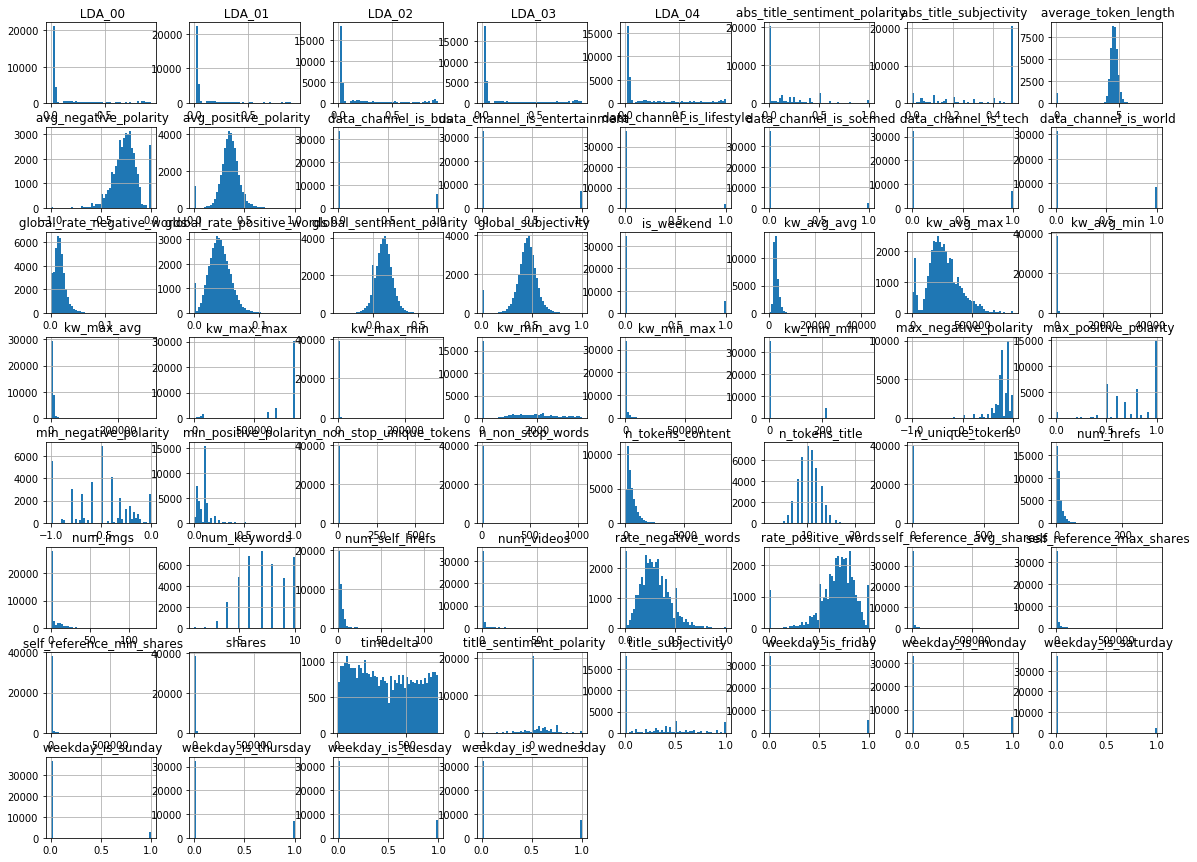

In [91]:
df.hist(bins=50)

## 4.Explore the data

In [92]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### Describe the column with categorical atribute
- In this case, there is only one object(not numerical) attribute which is the url of the article

In [93]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)


Column Name: url


## 5. Data Cleaning
- In this case, instance with 'na' should be drop. instance with 0 should should  not be drop. since there are many binary attribute

### Count numbers of zeros exist in column

In [94]:
#Count the number of zeros exist in col
df.isin([0]).sum(axis=0)

url                                   0
 timedelta                            0
 n_tokens_title                       0
 n_tokens_content                  1181
 n_unique_tokens                   1181
 n_non_stop_words                  1181
 n_non_stop_unique_tokens          1181
 num_hrefs                         1299
 num_self_hrefs                    5350
 num_imgs                          6987
 num_videos                       25026
 average_token_length              1181
 num_keywords                         0
 data_channel_is_lifestyle        37545
 data_channel_is_entertainment    32587
 data_channel_is_bus              33386
 data_channel_is_socmed           37321
 data_channel_is_tech             32298
 data_channel_is_world            31217
 kw_min_min                          79
 kw_max_min                         819
 kw_avg_min                          81
 kw_min_max                       17108
 kw_max_max                          79
 kw_avg_max                          79


### Count for 'NA'(null) instant

In [95]:
df.isnull().sum(axis=0)#axis=0:stack horizontally

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [96]:
#Drop the 'na' in this case there is no 'na' instance
df.dropna()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-1.875000e-01,0.000000,1.875000e-01,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000e+00,0.500000,0.000000e+00,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000e+00,0.500000,0.000000e+00,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000e+00,0.500000,0.000000e+00,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,1.363636e-01,0.045455,1.363636e-01,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,2.142857e-01,0.142857,2.142857e-01,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000e+00,0.500000,0.000000e+00,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,5.000000e-01,0.500000,5.000000e-01,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000e+00,0.375000,0.000000e+00,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000e+00,0.500000,0.000000e+00,710


## 6. Explore the target column

In [6]:
df['shares'].head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [7]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

### Plot the distribution of the labels

Text(0.5,1,'Distribution of Shares')

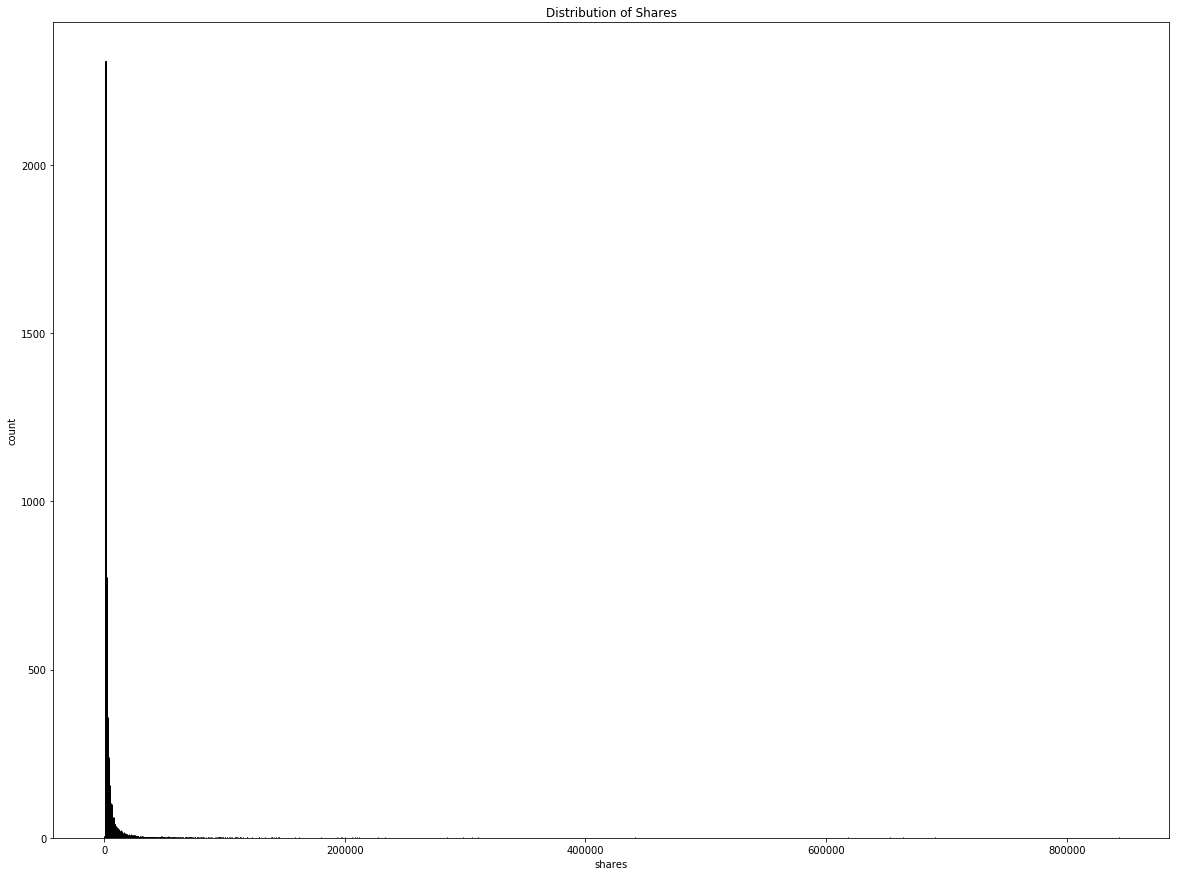

In [8]:
plt.bar(df['shares'].value_counts().index,
        df['shares'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)

plt.xlabel("shares")
plt.ylabel("count")
plt.title("Distribution of Shares")

### Correlation accross all field

In [5]:
df_corr = df.corr()

In [6]:
df_corr.style.background_gradient()

### Correlation accross labels 


In [7]:
df.corr()['shares'].sort_values(ascending=False)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

### Visualizing the numerical correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b2a412eb828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2b2a4387d9b0>]], dtype=object)

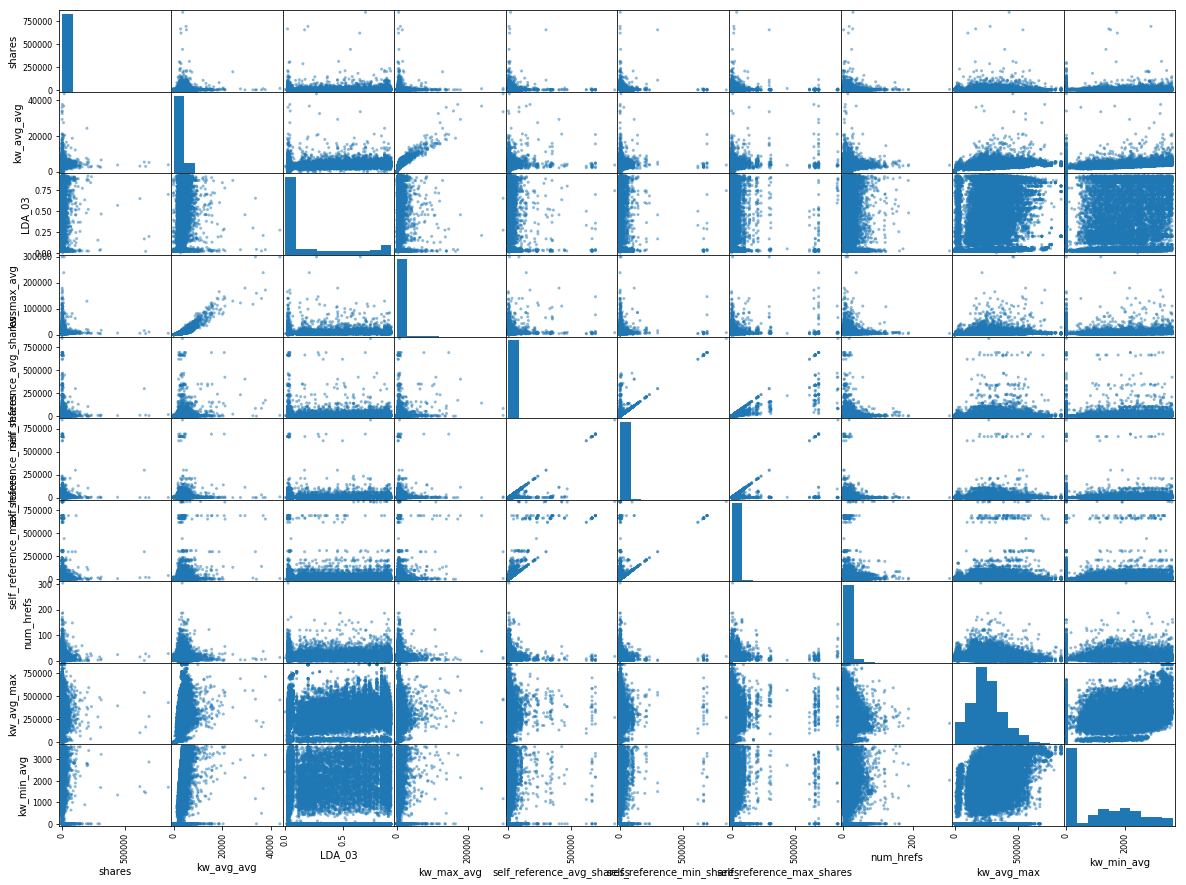

In [12]:
from pandas.plotting import scatter_matrix

#Extract the top attribute
attribute = list(df.corr()['shares'].sort_values(ascending=False).keys()[0:10])
scatter_matrix(df[attribute])

## 7. Categorical Correlation using One-hot encodin
- IN this case, since there are no object dtype in the dataframe and most col has been converted from object to number for exple 'yes' -> 1 and 'no' -> 0. 


## 8. Drop the redundant and meaningless features
- There is no redundant features most features is nearly indepentdent.

### Generate effective features by combinding a set of features


In [19]:
# #extra added field
# df['media'] = df['num_imgs'] + df['num_videos']
# df['href'] = df['num_hrefs'] + df['num_self_hrefs']

In [81]:
#selet the top 7 most correlated features
most_corr = df.corr()['shares'].sort_values(ascending=False)#Use all in this case
print(most_corr)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

## 19. Edit Dataframe to contain only the most correlated features
- Slicing step.

In [82]:
#In this case, ,most_corr.index will return an Index class 
# basically, this operation below will slice all relevant columns
df_corr = df.ix[:,most_corr.index]
df_corr.head()

,shares,kw_avg_avg,LDA_03,kw_max_avg,self_reference_avg_sharess,self_reference_min_shares,self_reference_max_shares,num_hrefs,kw_avg_max,kw_min_avg,...,rate_positive_words,data_channel_is_tech,LDA_04,data_channel_is_entertainment,min_negative_polarity,max_negative_polarity,average_token_length,avg_negative_polarity,data_channel_is_world,LDA_02
0,593,0.0,0.041263,0.0,496.000000,496.0,496.0,4.0,0.0,0.0,...,0.769231,0.0,0.040123,1.0,-0.600,-0.200000,4.680365,-0.350000,0.0,0.040005
1,711,0.0,0.050101,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,...,0.733333,0.0,0.050001,0.0,-0.125,-0.100000,4.913725,-0.118750,0.0,0.050096
2,1500,0.0,0.033334,0.0,918.000000,918.0,918.0,3.0,0.0,0.0,...,0.857143,0.0,0.682188,0.0,-0.800,-0.133333,4.393365,-0.466667,0.0,0.033351
3,1200,0.0,0.028905,0.0,0.000000,0.0,0.0,9.0,0.0,0.0,...,0.666667,0.0,0.028572,1.0,-0.600,-0.166667,4.404896,-0.369697,0.0,0.494651
4,505,0.0,0.028572,0.0,3151.157895,545.0,16000.0,19.0,0.0,0.0,...,0.860215,1.0,0.885427,0.0,-0.500,-0.050000,4.682836,-0.220192,0.0,0.028575


### Information about each features

- 27. kw_avg_avg: Avg. keyword (avg. shares) 
- 42. LDA_03: Closeness to LDA topic 3
- 26. kw_max_avg: Avg. keyword (max. shares) 
- 30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
- 28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
- 29. self_reference_max_shares: Max. shares of referenced articles in Mashable
- 7. num_hrefs: Number of links

## Generate pairs plot of selected variables
- To plot relationship between variable we can use pair plots. 
- Pair plot offer a range of display of paired combinaation of categorical and quantitative variales. 
- A pair plot allow 

In [1]:
import seaborn

ModuleNotFoundError: No module named 'seaborn'

In [83]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df_corr)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

ModuleNotFoundError: No module named 'seaborn'

## 10. Split up the data into test and train

In [84]:
allData = df_corr
y = df_corr['shares']
X = df_corr.drop('shares', axis=1)

### Add non-linearity to the data
- use sigmoid to add nonlinearity


In [85]:
# first normalize the data
# X -= X.mean(axis=0)/X.std(axis=0)
# relu = lambda x:np.maximum(0,x)

# X = relu(X.values)

In [86]:
from sklearn.model_selection import train_test_split

#split intoo training/testing sets with 20% split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 11. Establish benchmark
### Metrics
- To evaluate the performance of this regression tak, we will use the 2 standard metrics:
    - Mean Absolute Error(MAE): Average of the absolute value of the difference between prediction and the true values
    - Root mean square error(RMSE): The square root of the average of the squared difference between the predictions and the true values 

The mean absolute error is more interpretable, the the RMSE penalizes learger errors more heavily. Either one may be appropriate depending on the situation

In [87]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

## 12.Naive baseline
- For a regression task, a simple naive baseline is to guess the median value on the training set for all testing case. 
- If our machine learning model cannot do better than this baseline, then perhap we should try a difference approach

In [88]:
median_pred = y_train.median()
print(median_pred)

median_preds = [median_pred for _ in range(len(y_test))]
gtrue = y_test 

# Display the baseline metric
mb_mae, mb_rmse = evaluate_predictions(median_preds, gtrue)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

1400.0
Median Baseline  MAE: 2395.4153
Median Baseline RMSE: 11152.8831


## 13. Linear regression Using Scikit-learn
- 2 step:
    - Create model(Linear regression object)
    - train the model
    
- Then, We can find the intercept and features weights by using the 'intercept' and 'coef' methods of the linear regression object respectively. 
- Finally, you can make prediction using `predict()` method

### Performance measurement of Regression models in sklearn
- RMSE: scikit learn 'Mean_square_error" function can be used to compute the RMSE for the whole training set
- r2_score: skelarn 'r2_score" function also called the coefficient of determination regerssion score function or the r2(r squared or r^2) scores. It measure the propotion of the variance in the dependent variable(target) that is predictable from the indepentdent variable(s), features. The best possible scores of r2 is 1.0 and it can be negative(because the model can be arbitary worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R62 scores of 0.0

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#create a linear model object
model = LinearRegression()

#train the model using the training data and label 
model.fit(X_train, y_train)

#the intercept 
b = model.intercept_
print("Intercept: ", b)

#the features weight
m = model.coef_
print("Coeff:",m)

## Show the predicted formula 
result = ""
for idx, c in enumerate(m):
    result += str(c) + " * x_%d + "%idx
    
#WHere x_0=0
print("\nF(x)=",result)

#Make the predictions using the test data
y_pred = model.predict(X_test)

print('accuracy', (y_pred==y_test).mean())
print("\nMSE(Mean square error):",mean_squared_error(y_test, y_pred), "\nr^2(Coeff of determination):",r2_score(y_test, y_pred))

Intercept:  1320516.30785
Coeff: [  1.61867920e+00  -1.32239162e+06  -1.99331419e-01  -1.13812136e-02
   2.29598689e-02   8.13965885e-03   2.54658733e+01   1.74834647e-04
  -3.54949707e-01   5.44975069e+00   2.81702738e+03  -4.50943340e-01
   1.04631018e-01   7.24543628e+02   7.79195285e+00  -9.99264133e+01
   5.36169336e+01   1.91973073e+02   3.32236147e+02   1.33306308e+02
  -1.61282710e+03   1.76819900e+02   3.42377112e+02   1.44851338e+02
   1.77443275e+00  -1.40253666e+02  -3.30442727e-04   4.30376888e+03
  -1.05608791e+03  -6.64191106e+02   1.68486147e+03  -2.77216960e-03
   7.97877263e-01   8.10781595e+02   2.82686535e+03  -1.49735601e+04
  -2.35915612e+03  -1.29389181e+03  -1.82398433e+03   4.60405177e-01
  -6.61234920e+01  -1.32191408e+06   3.79398316e+00  -9.59464111e+01
   2.17396352e+03  -1.79120457e+02  -2.63101615e+02  -1.32286483e+06
  -1.20084272e+03   1.99819174e+03  -6.41487073e+02  -1.32245944e+06
  -1.23018238e+03   4.04219718e+02  -6.93295339e+02  -3.14968637e+02
 

In [90]:
import numpy as np

# Model Metrics
mae = np.mean(abs(y_pred - y_test))
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

print("Linear Regression MAE: ", mae)
print("Linear Regression RMSE: ", rmse)


# Baseline Metrics
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))


print("\nBaseline MAE: ", baseline_mae)
print("Baseline RMSE: ", baseline_rmse)

Linear Regression MAE:  3007.68962411
Linear Regression RMSE:  10838.9417204

Baseline MAE:  2395.41531088
Baseline RMSE:  11152.8830928


In [65]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>
